# CS 273A Homework 4
Machine Learning, CS 273A, Fall 2020

by Marzhan Bekbalanova

# 1. Setting up the data and Linear Classifier (10 + 20 points)

In [1]:
import numpy as np 
import mltools as ml
import matplotlib.pyplot as plt

In [2]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)


1. Print the minimum, maximum, mean, and the variance of all of the features. 5 points

In [3]:
X.shape

(200000, 14)

In [4]:
X.min(axis=0)

array([ 1.9350e+02,  1.5250e+02,  2.1425e+02,  1.5250e+02,  1.0000e+01,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  8.7589e-01,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  9.9049e-01, -9.9990e+02])

In [5]:
X.max(axis=0)

array([2.5300e+02, 2.4900e+02, 2.5250e+02, 2.5250e+02, 3.1048e+04,
       1.3630e+04, 9.2380e+03, 1.2517e+02, 1.9167e+01, 1.3230e+01,
       6.6761e+01, 7.3902e+01, 9.7504e+02, 7.9720e+02])

In [6]:
X.var(axis=0)

array([8.34991711e+01, 9.26255931e+01, 3.52863398e+01, 9.76257317e+01,
       1.56515138e+07, 3.08176182e+06, 4.43951746e+05, 8.21948502e+00,
       6.40504819e+00, 4.36344047e+00, 4.08637188e+00, 2.19877847e+00,
       4.04646245e+02, 3.40652055e+03])

2. Split the dataset, and rescale each into training and validation, as:

In [7]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

Print the min, maximum, mean, and the variance of the rescaled features. 5 points

In [8]:
XvS.shape

(40000, 14)

In [9]:
XvS.min(axis=0)

array([ -5.05121608,  -3.86462246,  -4.42930745,  -2.85705094,
        -0.78361138,  -0.53558246,  -0.19922793,  -1.14692323,
        -2.09750368,  -0.99668114,  -2.06228172,  -1.91940215,
        -0.45547474, -20.08410479])

In [10]:
XvS.max(axis=0)

array([ 1.23395994,  2.2402768 ,  1.78265349,  1.96750064,  7.14146873,
        7.42892516, 13.33413962,  8.94907924,  4.63204587,  5.27501952,
       12.90293796, 38.12521522, 46.73267548, 15.76068429])

In [11]:
XvS.var(axis=0)

array([0.98600011, 0.9956201 , 0.98389247, 0.99859833, 1.01415036,
       1.05885165, 0.98351265, 1.02311629, 0.99125452, 0.98456147,
       0.95976695, 1.14019486, 1.01930135, 1.2596654 ])

In [12]:
learner = ml.linearC.linearClassify()
learner.train(XtS, Yt, reg=0.0, initStep=0.5, stopTol=1e-6, stopIter=100)
print(learner.auc(XtS, Yt))
print(learner.auc(XvS,Yva))
print(learner.theta)

0.6455155080213903
0.6469112262403897
[[-0.63204933 -0.59487441  0.32487329 -0.20956066 -0.13839599 -0.01952566
   0.35015442 -0.35074296 -0.20532575 -0.04599062 -0.14733166 -0.29039135
   0.18029266 -0.10820371  0.11714784]]


3. One of the important aspects of using linear classifiers is the regularization. Vary the amount of regularization, reg, in a wide enough range, and plot the training and validation AUC as the regularization
weight is varied. Show the plot. 10 points


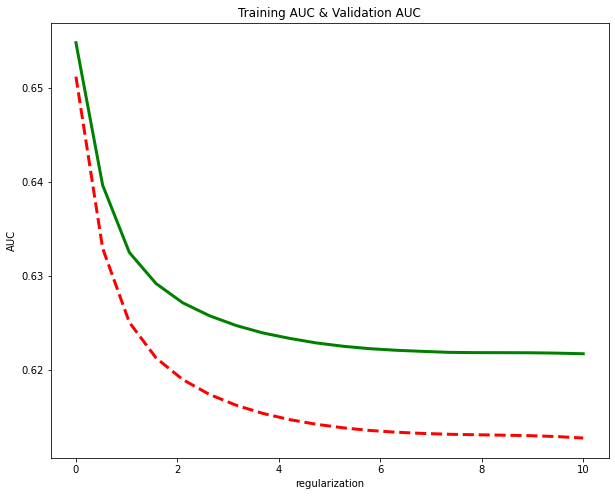

[[-0.01802278 -0.0094076  -0.00512726 -0.00468394 -0.00359276  0.00032792
  -0.00370817 -0.00754413 -0.0020671   0.00508796  0.00497926  0.00342187
   0.00615063 -0.00693361  0.00498338]]


In [13]:
A=np.linspace(0,10,20)
tr_auc=np.zeros(len(A))
va_auc=np.zeros(len(A))
for i,a in enumerate(A):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=a, initStep=0.05, stopTol=1e-7, stopIter=100)
    tr_auc[i]=learner.auc(XtS,Yt)
    va_auc[i]=learner.auc(XvS,Yva)
#print(learner.theta)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(A, tr_auc, 'g-', lw=3, label='Training AUC')
ax.plot(A, va_auc,'r--', lw=3, label='Validation AUC')
plt.xlabel('regularization')
plt.ylabel('AUC')
plt.title("Training AUC & Validation AUC")
plt.show()
print(learner.theta)

4. We have also studied the use of polynomial features to make linear classifiers more complex. Add
degree 2 polynomial features, print out the number of features, why it is what it is. 5 points

In [4]:
Xtd2 = ml.transforms.fpoly(Xt, 2, bias=False)
print(Xt.shape)
print(Xtd2.shape)

(5000, 14)
(5000, 119)


Because it is a combination (14, 2) when we can choose 2 features from 14 and add to it each feature (14,2)+2*14=14!/(12!2!)+28=119

5. Reuse your code that varied regularization to compute the training and validation performance (AUC)
for this transformed data. Show the plot. 5 points

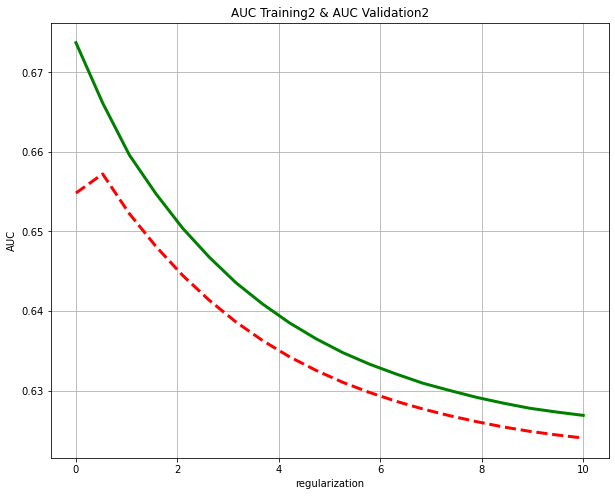

[[-1.51747890e-02  3.29134262e-03  1.46785152e-05 -1.31559422e-03
   7.22602534e-04 -7.08978635e-04  1.02817094e-03  2.69572971e-03
  -1.29984484e-03  4.24675292e-05 -5.11443976e-04  2.17018112e-03
  -1.55498731e-03  2.81630171e-05 -6.85243195e-04  8.93360859e-04
   3.13815502e-03 -5.78087441e-04  2.48877491e-04  1.53888384e-04
  -3.75416878e-04  1.83372207e-03  3.58247948e-03 -9.83067973e-04
   7.59242962e-04  2.86742881e-04  9.63189048e-05  8.20429089e-04
  -2.08759614e-03  2.22093420e-03 -1.63359181e-03 -7.49592623e-04
  -1.58048822e-03  1.96040033e-05 -9.84112694e-04 -1.69986748e-03
  -5.38721299e-04  7.93725979e-04 -6.18920586e-04 -5.34734873e-04
  -6.39141002e-04 -6.83106798e-04 -7.10720812e-04 -1.51510942e-04
  -4.06505422e-04  1.42596718e-03  3.37399312e-03  5.36716390e-04
   9.27500993e-04  1.30012912e-03  2.06908623e-04  7.46073756e-04
   1.00026086e-03 -3.32377152e-04  8.59753933e-04  7.89889110e-05
   3.72649582e-03 -9.96933261e-04 -4.52327722e-05 -1.51723834e-04
  -1.76735

In [5]:
A=np.linspace(0,10,20)
#Xtd2= ml.transforms.fpoly(Xt, 2, bias=False)
Xtd2S,params = ml.transforms.rescale(Xtd2)
Xvad2S,_ = ml.transforms.rescale( ml.transforms.fpoly(Xva,2,False), params)
tr_auc_d2=np.zeros(len(A))
va_auc_d2=np.zeros(len(A))
for i,a in enumerate(A):
    learner = ml.linearC.linearClassify()
    learner.train(Xtd2S, Yt, reg=a, initStep=0.005, stopTol=1e-7, stopIter=200)
    tr_auc_d2[i]=learner.auc(Xtd2S,Yt)
    va_auc_d2[i]=learner.auc(Xvad2S,Yva)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(A, tr_auc_d2, 'g-', lw=3, label='AUC Training2')
ax.plot(A, va_auc_d2,'r--', lw=3, label='AUC Validation2')
ax.grid()
plt.xlabel('regularization')
plt.ylabel('AUC')
plt.title("AUC Training2 & AUC Validation2")
plt.show()
print(learner.theta)

# 2 Nearest Neighbors (20 points)

In this problem, you will analyze an existing implementation of K-Nearest-neighbor classification for the
Kaggle dataset. The K-nearest neighbor classifier implementation supports two hyperparameters: the size of
the neighborhood, K, and how much to weigh the distance to the point, a (0 means no unweighted average,
and the higher the α, the higher the closer ones are weighted1
). Note, you might have to subsample a lot for
KNN to be efficient.

In [4]:
learner = ml.knn.knnClassify()
learner.train(XtS, Yt, K=1, alpha=0.0)
learner.auc(XtS, Yt) # train AUC

0.9971659855301417

1. Plot of the training and validation performance for an appropriately wide range of K, with α = 0. 5
points

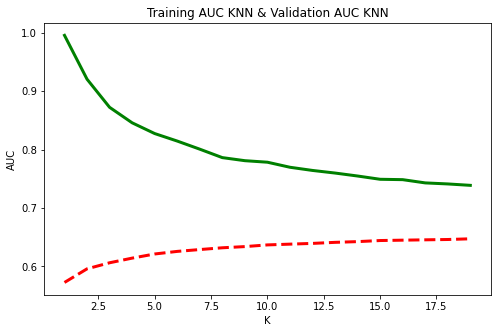

In [7]:
K = range(1,20,1)
tr_auc_knn = np.zeros(len(K))
va_auc_knn = np.zeros(len(K))
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(XtS, Yt, K=k, alpha=0)
    tr_auc_knn[i] =learner.auc(XtS, Yt) # train AUC
    va_auc_knn[i] =learner.auc(XvS, Yva)# validation AUC
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(K, tr_auc_knn, 'g-', lw=3, label='Training AUC KNN')
ax.plot(K, va_auc_knn,'r--', lw=3, label='Validation AUC KNN')
plt.xlabel('K')
plt.ylabel('AUC')
plt.title("Training AUC KNN & Validation AUC KNN")
plt.show()

2. Do the same with unscaled/original data, and show the plots. 5 points


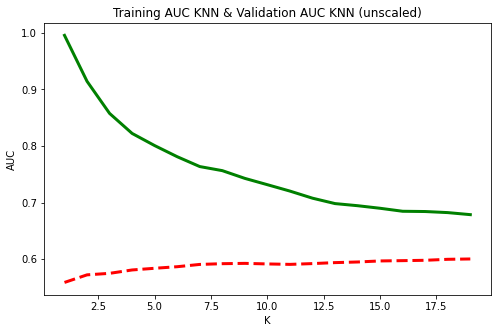

In [8]:
K = range(1,20,1)
tr_auc_knn = np.zeros(len(K))
va_auc_knn = np.zeros(len(K))
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xt, Yt, K=k, alpha=0)
    tr_auc_knn[i] =learner.auc(Xt, Yt) # train AUC
    va_auc_knn[i] =learner.auc(Xva, Yva)# validation AUC
# plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(K, tr_auc_knn, 'g-', lw=3, label='Training AUC KNN')
ax.plot(K, va_auc_knn,'r--', lw=3, label='Validation AUC KNN')
plt.xlabel('K')
plt.ylabel('AUC')
plt.title("Training AUC KNN & Validation AUC KNN (unscaled)")
plt.show()

3. Since we need to select both the value of K and α, we need to vary both, and see how the performance
changes. For a range of both K and α, compute the training and validation AUC (for unscaled or
scaled data, whichever you think would be a better choice), and plot them in a two dimensional plot
like so:

Show both the plots, and recommend a choice of K and α based on these results. 10 points

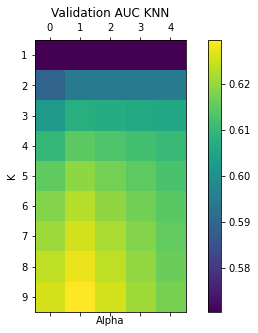

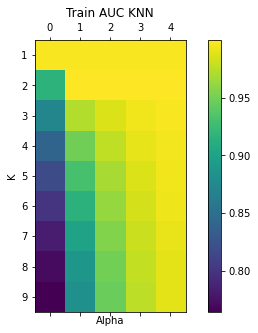

[0.62583689 0.62959559 0.62549311 0.62120847 0.61736382]


In [48]:
K = range(1,10,1)
A = range(0,5,1)
tr_auc_knn = np.zeros((len(K),len(A)))
va_auc_knn = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc_knn[i][j] =learner.auc(XtS, Yt) # train AUC
        va_auc_knn[i][j] =learner.auc(XvS, Yva)# validation AUC
# Now plot it
#Validation
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc_knn, interpolation='nearest')
f.colorbar(cax)
plt.title("Validation AUC KNN")
plt.xlabel("Alpha")
plt.ylabel("K")
plt.xticks(range(len(A)), A)
plt.yticks(range(len(K)), K)
plt.show()
#Train
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc_knn, interpolation='nearest')
f.colorbar(cax)
plt.title("Train AUC KNN")
plt.xlabel("Alpha")
plt.ylabel("K")
plt.xticks(range(len(A)), A)
plt.yticks(range(len(K)), K)
plt.show()
print(va_auc_knn[-1,:])

The recommended choice for validation alpha=1 and K = 9

In [52]:
indices=np.where(va_auc_knn==va_auc_knn.max())
print(indices)
print('Best Validation AUC is for K=9 & Alpha=1')
print('Validation AUC Max =',va_auc_knn.max())

(array([8], dtype=int64), array([1], dtype=int64))
best Validation AUC is for K=9 & Alpha=1
Validation AUC Max = 0.6295955905478804


# 3 Decision Trees (20 points)

In [ ]:
learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=15)

1. Keeping minParent=2 and minLeaf=1, vary maxDepth to a range of your choosing, and plot
the training and validation AUC. 5 points

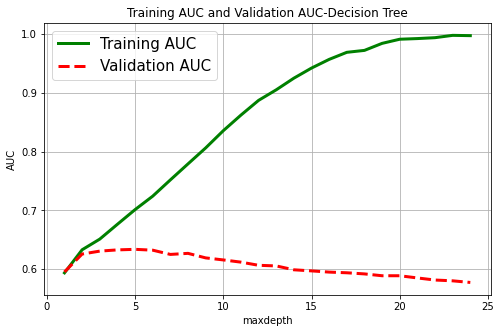

In [40]:
D=range(1,25)
tr_auc_dr = np.zeros(len(D))
va_auc_dr = np.zeros(len(D))
nodes_dr=np.zeros(len(D))
for i,d in enumerate(D):
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=2, maxDepth=d, minLeaf=1)
    tr_auc_dr[i]=learner.auc(Xt,Yt)
    va_auc_dr[i]=learner.auc(Xva,Yva)
    nodes_dr[i]=learner.sz
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(D, tr_auc_dr, 'g-', lw=3, label='Training AUC')
ax.plot(D, va_auc_dr,'r--', lw=3, label='Validation AUC')
ax.legend(fontsize=15)
ax.grid()
plt.xlabel('maxdepth')
plt.ylabel('AUC')
plt.title("Training AUC and Validation AUC-Decision Tree")
plt.show()

2. Plot the number of nodes in the tree as maxDepth is varied (using learner.sz). Plot another
line in this plot by increasing either minParent or minLeaf (choose either, and by how much). 5
points

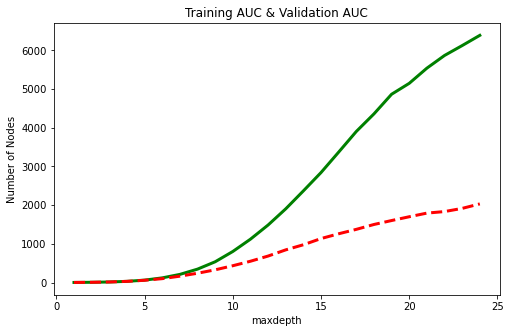

In [60]:
#Increase minParent to 10 and replot number of nodes
nodes2_dr=np.zeros(len(D))
for i,d in enumerate(D):
    learner2 = ml.dtree.treeClassify(Xt, Yt, minParent=10, maxDepth=d, minLeaf=1)
    nodes2_dr[i]=learner2.sz

f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(D, nodes_dr, 'g-', lw=3, label='Nodes for MinParent=2')
ax.plot(D, nodes2_dr,'r--', lw=3, label='Nodes for MinParent=10')
plt.xlabel('maxdepth')
plt.ylabel('Number of Nodes')
plt.title("Training AUC & Validation AUC")
plt.show()

3. Set maxDepth to a fixed value, and plot the training and validation performance of the other two
hyper-parameters in an appropriate range, using the same 2D plot we used for nearest-neighbors.
Show the plots, and recommend a choice for minParent and minLeaf based on these results. 10
points

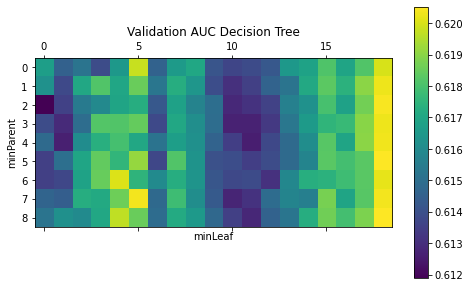

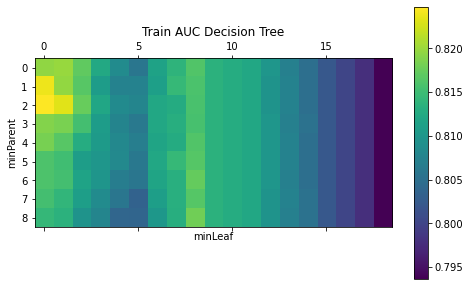

In [24]:
#Set maxDepth=10 and varying minParnt and minLeaf
P = range(1,18,2)
L = range(1,20,1)
tr_auc_dtr = np.zeros((len(P),len(L)))
va_auc_dtr = np.zeros((len(P),len(L)))
for i,p in enumerate(P):
    for j,l in enumerate(L):
        learner = ml.dtree.treeClassify(Xt, Yt, minParent=p, maxDepth=10, minLeaf=l)
        tr_auc_dtr[i][j]=learner.auc(Xt,Yt)
        va_auc_dtr[i][j]=learner.auc(Xva,Yva)



# Now plot it
P = range(1,18,2)
L = range(1,20,1)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc_dtr, interpolation='nearest')
f.colorbar(cax)
plt.title("Validation AUC Decision Tree")
plt.xlabel("minLeaf")
plt.ylabel("minParent")
plt.show()
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc_dtr, interpolation='nearest')
f.colorbar(cax)
plt.title("Train AUC Decision Tree")
plt.xlabel("minLeaf")
plt.ylabel("minParent")
plt.show()

In [49]:
indices = np.where(va_auc_dtr == va_auc_dtr.max())
print('for max depth=10, minparent =8 & minLeaf=18 returns highest validation auc')
print('Validation AUC Max =', va_auc_dtr.max())


for max depth=10, minparent =8 & minLeaf=18 returns highest validation auc
Validation AUC Max = 0.6205225498600272


In [50]:
indices = np.where(va_auc_dtr == va_auc_dtr.max())
indices

(array([8], dtype=int64), array([18], dtype=int64))

Therefore, I recommend to usemax depth=10, minparent =8 & minLeaf=18 to achieve highest validation auc

# 4 Neural Networks and Conclusion (20 + 5 points)

Last we will explore the use of neural networks for the same Kaggle dataset. The neural networks contain
many possible hyper-parameters, such as the number of layers, the number of hidden nodes in each layer, the
activation function the hidden units, etc. These don’t even take into account the different hyper-parameters
of the optimization algorithm.


In [ ]:
nn = ml.nnet.nnetClassify()
nn.init_weights([[XtS.shape[1], 5, 2], 'random', XtS, Yt) # as many layers nodes youwant
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)


1. Vary the number of hidden layers and the nodes in each layer (we will assume each layer has the
same number of nodes), and compute the training and validation performance. Show 2D plots, like
for decision trees and K-NN classifiers, and recommend a network size based on the above. 10 points

In [15]:
XtS.shape[1]

14

In [16]:
Yt.shape

(5000,)

In [17]:
XtS.shape

(5000, 14)

In [19]:
XvS.shape

(40000, 14)

In [13]:
L=range(1,4)
N=range(3,9)
tr_auc_NN = np.zeros((len(L),len(N)))
va_auc_NN = np.zeros((len(L),len(N)))
for i,l in enumerate(L):
    for j,n in enumerate(N):
        dd=n*np.ones(l)
        w=np.insert(dd,l,2)
        w=np.insert(w,0,XtS.shape[1])
        w=w.astype(int)
        # #print(w)

        nn = ml.nnet.nnetClassify()
        nn.init_weights(w, 'random', XtS, Yt)
        print("L=",l," N=", n)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=550)

        tr_auc_NN[i][j]=nn.auc(XtS,Yt)
        va_auc_NN[i][j]=nn.auc(XvS,Yva)

L= 1  N= 3
it 1 : Jsur = 0.4421456577116156, J01 = 0.3546
it 2 : Jsur = 0.43742415988293426, J01 = 0.3466
it 4 : Jsur = 0.42868605088087225, J01 = 0.3316
it 8 : Jsur = 0.41988732892651043, J01 = 0.3174
it 16 : Jsur = 0.4142202905125307, J01 = 0.3106
it 32 : Jsur = 0.41173783917190376, J01 = 0.307
it 64 : Jsur = 0.41051360598122644, J01 = 0.306
it 128 : Jsur = 0.40995836345504505, J01 = 0.306
it 256 : Jsur = 0.4097061087843001, J01 = 0.306
it 512 : Jsur = 0.4095896698101617, J01 = 0.305
L= 1  N= 4
it 1 : Jsur = 0.44182929020238515, J01 = 0.3548
it 2 : Jsur = 0.4366900374944084, J01 = 0.3444
it 4 : Jsur = 0.42654269899966313, J01 = 0.3282
it 8 : Jsur = 0.41707973827487166, J01 = 0.318
it 16 : Jsur = 0.41217795531720175, J01 = 0.3088
it 32 : Jsur = 0.4106125402918792, J01 = 0.3072
it 64 : Jsur = 0.4099718537227014, J01 = 0.307
it 128 : Jsur = 0.4094096124954772, J01 = 0.305


KeyboardInterrupt: 

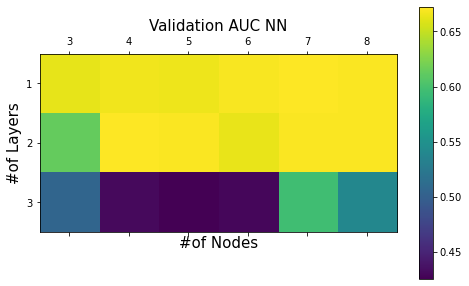

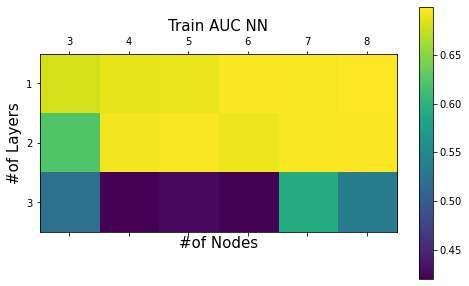

In [10]:
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc_NN, interpolation='nearest')
f.colorbar(cax)
plt.title("Validation AUC NN",fontsize=15)
plt.xlabel("#of Nodes",fontsize=15)
plt.ylabel("#of Layers",fontsize=15)
plt.xticks(range(len(N)), N)
plt.yticks(range(len(L)), L)
plt.show()
#Train
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc_NN, interpolation='nearest')
f.colorbar(cax)
plt.title("Train AUC NN",fontsize=15)
plt.xlabel("#of Nodes",fontsize=15)
plt.ylabel("#of Layers",fontsize=15)
plt.xticks(range(len(N)), N)
plt.yticks(range(len(L)), L)
plt.show()

In [11]:
va_auc_NN == va_auc_NN.max()

array([[False, False, False, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [21]:
np.max(va_auc_NN)
print("L =2 & N= 7 returns highest Validation AUC")
print('VA_AUC_MAX =',va_auc_NN[1,4])

L =2 & N= 7 returns highest Validation AUC
VA_AUC_MAX = 0.6691847476287018


Therefore, I recommend to use number of layers L=2 and number of nodes N = 7 to achieve max AUC

2. Implement a new activation function of your choosing, and introduce it as below:

In [21]:
sig = lambda z: np.atleast_2d(np.arctan(z))
dsig = lambda z: np.atleast_2d(1/(1+ np.power(z, 2)))
#We choose L=2,N=7
w=[XtS.shape[1],7,7,2]
#Define Arctan as activation function
nn_atan=ml.nnet.nnetClassify()
nn_atan.init_weights(w, 'random', XtS, Yt)
nn_atan.setActivation('custom', sig, dsig)
nn_atan.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
tr1_auc_NN_atan=nn_atan.auc(XtS,Yt)
va1_auc_NN_atan=nn_atan.auc(XvS,Yva)


nn_htan = ml.nnet.nnetClassify()
nn_htan.init_weights(w, 'random', XtS, Yt)
nn_htan.setActivation('htangent')
nn_htan.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
tr1_auc_NN_htan=nn_htan.auc(XtS,Yt)
va1_auc_NN_htan=nn_htan.auc(XvS,Yva)
nn = ml.nnet.nnetClassify()
nn.init_weights(w, 'random', XtS, Yt)
nn.setActivation('logistic')
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
tr1_auc_NN=nn.auc(XtS,Yt)
va1_auc_NN=nn.auc(XvS,Yva)
print('Validation AUC Arctan=',va1_auc_NN_atan, ' & Train AUC Arctan=', tr1_auc_NN_atan)
print('Validation AUC htan=',va1_auc_NN_htan, ' & Train AUC htan=', tr1_auc_NN_htan)
print('Validation AUC logistic=',va1_auc_NN, ' & Train AUC logistic=', tr1_auc_NN)

it 1 : Jsur = 0.45533080722252334, J01 = 0.34
it 2 : Jsur = 0.45167486204453605, J01 = 0.34
it 4 : Jsur = 0.4503096352624305, J01 = 0.34
it 8 : Jsur = 0.44936345388200416, J01 = 0.34
it 16 : Jsur = 0.4489337180711049, J01 = 0.34
it 32 : Jsur = 0.44883030891976894, J01 = 0.34
it 64 : Jsur = 0.4488070415045302, J01 = 0.34
it 128 : Jsur = 0.44876837650392754, J01 = 0.34
it 256 : Jsur = 0.41343514008036564, J01 = 0.3062
it 1 : Jsur = 0.4553308105786793, J01 = 0.34
it 2 : Jsur = 0.4516748565028721, J01 = 0.34
it 4 : Jsur = 0.45030960755733607, J01 = 0.34
it 8 : Jsur = 0.44936329389583846, J01 = 0.34
it 16 : Jsur = 0.44892842333847954, J01 = 0.34
it 32 : Jsur = 0.4168462217801911, J01 = 0.317
it 64 : Jsur = 0.41149554263290655, J01 = 0.3068
it 128 : Jsur = 0.4069649467151065, J01 = 0.3046
it 256 : Jsur = 0.4020533256134967, J01 = 0.2994
it 1 : Jsur = 0.4410639187849938, J01 = 0.351
it 2 : Jsur = 0.43525673174946267, J01 = 0.3436
it 4 : Jsur = 0.4319815770350429, J01 = 0.34
it 8 : Jsur = 0.43

3. Pick the classifier that you think will perform best, mention all of its hyper-parameter values, and
explain the reason for your choice. Train it on as much data as you can, preferably all of X, submit
the predictions on Xtest to Kaggle, and include your Kaggle username and leaderboard AUC in the
report.
Here’s the code to create the Kaggle submission:

I picked neural network classifier with htan activation function because it gave us the highest AUC value. In addition, choosing number of layers L=2 and number of nodes N = 7 gave us the max AUC; therefore, I used these parameters for training.

In [51]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
#learner = .. # train one using X,Y
nn_htan = ml.nnet.nnetClassify()
nn_htan.init_weights(w, 'random', X, Y)
nn_htan.setActivation('htangent')
nn_htan.train(X, Y, stopTol=1e-8, stepsize=.25, stopIter=300)

Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')


it 1 : Jsur = 0.4584257930135697, J01 = 0.342895
it 2 : Jsur = 0.4545389380896322, J01 = 0.342895
it 4 : Jsur = 0.4523017856845221, J01 = 0.342895
it 8 : Jsur = 0.4512256886454583, J01 = 0.342895
it 16 : Jsur = 0.4508982750381497, J01 = 0.342895
it 32 : Jsur = 0.4507459840302516, J01 = 0.342895
it 64 : Jsur = 0.4506771570608384, J01 = 0.342895


In [20]:
w.shape

(3,)

In [ ]:
Kaggle username: Marzhanee

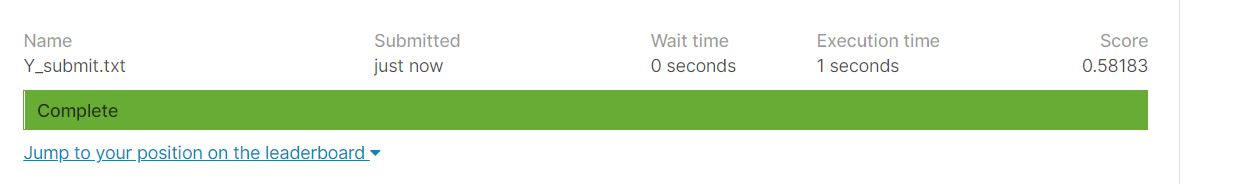

In [54]:
from IPython.display import Image
Image(filename='KaggleScore.jpg')

In [53]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
#learner = .. # train one using X,Y
learner = ml.nnet.nnetClassify()
learner.init_weights(w, 'random', X, Y)
learner.setActivation('htangent')
learner.train(X, Y, stopTol=1e-8, stepsize=.25, stopIter=300)

Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit2.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

it 1 : Jsur = 0.44544595244969176, J01 = 0.342895
it 2 : Jsur = 0.44224774959945695, J01 = 0.342895
it 4 : Jsur = 0.4412359360588343, J01 = 0.342895
it 8 : Jsur = 0.4402776175096402, J01 = 0.342895
it 16 : Jsur = 0.4387449032019304, J01 = 0.338495
it 32 : Jsur = 0.43882091024577013, J01 = 0.33817
it 64 : Jsur = 0.4392686461687732, J01 = 0.337225
it 128 : Jsur = 0.4393251577879392, J01 = 0.3372
it 256 : Jsur = 0.4403590463134109, J01 = 0.33886


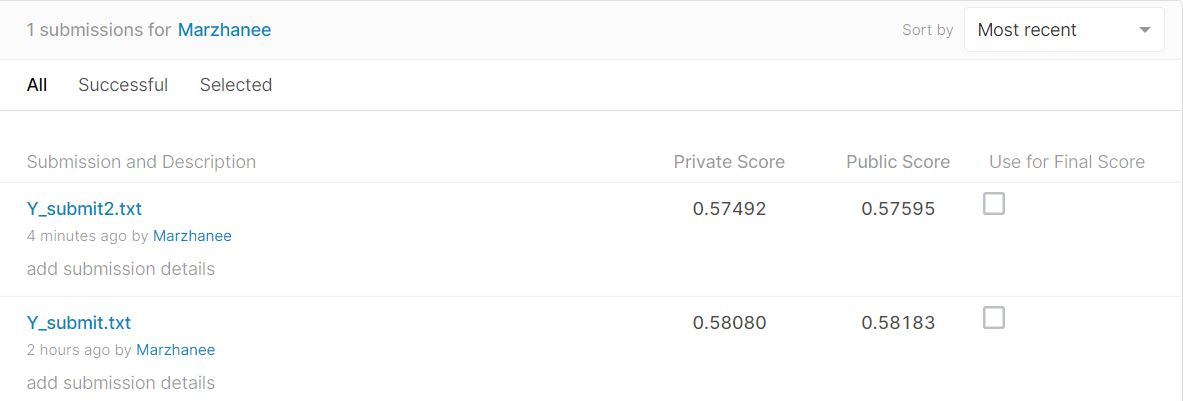

In [55]:
from IPython.display import Image
Image(filename='KaggleBoard.jpg')

# Statement of Collaboration (5 points)

I, Bekbalanova Marzhan have not collaborated with anyone